# Nama: Leta Lestari

### Arahan Assignment
0. Gunakan dataset student score
1. Lakukan proses Exploratory data analysis
2. Lakukan feature engineering :
- Check Duplicated Data
- Check Missing Value Handling
- Outlier Analysis
3. Lakukan modelling machine learning regression : gunakan minimal 2 model (linear regression, decision tree regressor, atau random forest regressor)
4. Lakukan evaluasi model
5. Berikan kesimpulan model mana yang terbaik performanya

In [3]:
# Import libraries and resources
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [4]:
df = pd.read_csv('student_scores.csv')
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


## 1. Exploratory Data Analysis (EDA)

In [6]:
# Exploratory Data Analysis
# Menampilkan informasi umum mengenai dataset
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 532.0 bytes
None
           Hours     Scores
count  25.000000  25.000000
mean    5.012000  51.480000
std     2.525094  25.286887
min     1.100000  17.000000
25%     2.700000  30.000000
50%     4.800000  47.000000
75%     7.400000  75.000000
max     9.200000  95.000000


In [7]:
# Mengecek missing values dan data duplikat
print("Jumlah Missing Values:")
print(df.isnull().sum())
print("Jumlah Data Duplikat:")
print(df.duplicated().sum())

Jumlah Missing Values:
Hours     0
Scores    0
dtype: int64
Jumlah Data Duplikat:
0


C:\Users\USER\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


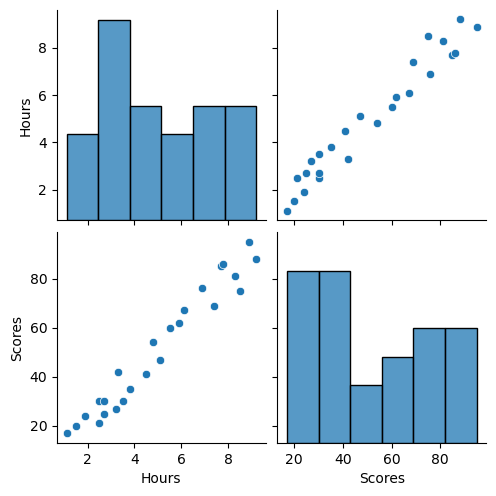

In [8]:
# Visualisasi Distribusi Data
sns.pairplot(df)  # Membuat pairplot untuk melihat hubungan antar variabel
plt.show()

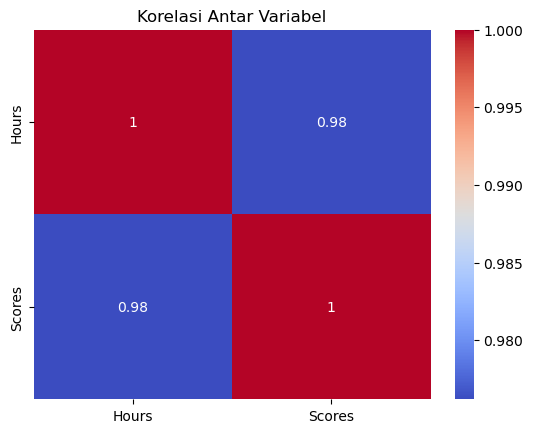

In [9]:
# Visualisasi hubungan antara variabel
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Korelasi Antar Variabel")
plt.show()

## 2. Feature Engineering

In [11]:
# Check Duplicated Data
print("\nJumlah Data Duplikat:", df.duplicated().sum())


Jumlah Data Duplikat: 0


In [12]:
# Check Missing Value Handling
print("\nJumlah Missing Values:")
print(df.isnull().sum())


Jumlah Missing Values:
Hours     0
Scores    0
dtype: int64


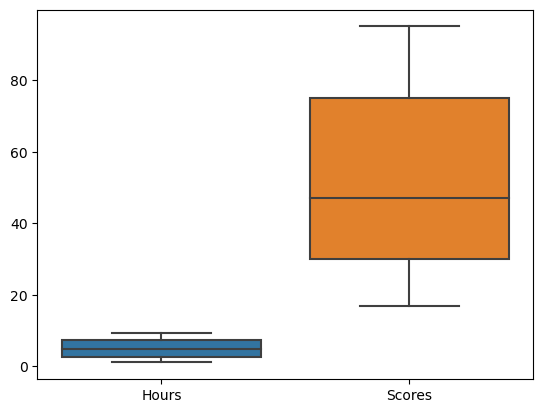

In [13]:
# Outlier Analysis
# Visualisasi outlier menggunakan boxplot
sns.boxplot(data=df)
plt.show()

In [14]:
# Menangani outlier dengan metode IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]

## 3. Modeling Machine Learning Regression

In [16]:
# Memisahkan fitur (X) dan target (y)
X = df.drop(columns=['Scores'])  # 'Scores' sebagai target
y = df['Scores']

In [17]:
# Membagi dataset menjadi training set dan testing set (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# Menggunakan minimal 2 model regresi
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor()
}

results = {}  # Dictionary untuk menyimpan hasil evaluasi model

In [19]:
# Melatih dan mengevaluasi setiap model
for name, model in models.items():
    model.fit(X_train, y_train)  # Melatih model
    y_pred = model.predict(X_test)  # Memprediksi hasil
    
    # Menghitung metrik evaluasi
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Menyimpan hasil evaluasi
    results[name] = {"MAE": mae, "MSE": mse, "R2": r2}

## 4. Evaluasi Model

In [21]:
# Menampilkan hasil evaluasi dalam bentuk dataframe
results_df = pd.DataFrame(results).T
print("\nHasil Evaluasi Model:")
print(results_df)


Hasil Evaluasi Model:
                              MAE        MSE        R2
Linear Regression        3.920751  18.943212  0.967806
Decision Tree Regressor  5.400000  31.700000  0.946125
Random Forest Regressor  2.672000  11.301167  0.980793


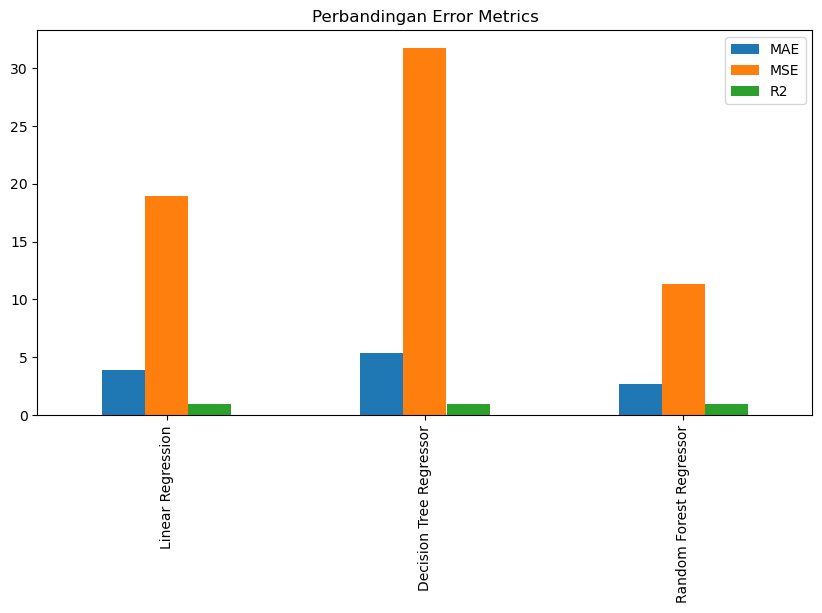

In [22]:
# Visualisasi Perbandingan Performa Model
results_df[['MAE', 'MSE', 'R2']].plot(kind='bar', figsize=(10, 5), title="Perbandingan Error Metrics")
plt.show()

## 5. Kesimpulan Model yang terbaik

In [24]:
# Menentukan model terbaik berdasarkan nilai R² tertinggi
best_model = results_df['R2'].idxmax()
print(f"\nModel terbaik berdasarkan R2 Score: {best_model}")


Model terbaik berdasarkan R2 Score: Random Forest Regressor
